In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv("loantrain.csv")
df.shape

(614, 13)

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [5]:
tm=df.groupby("Loan_Status").mean()
tm
v1=tm.iloc[0,:]
v2=tm.iloc[1,:]
abs((v2-v1)/(v1+v2))


ApplicantIncome      0.005726
CoapplicantIncome    0.110365
LoanAmount           0.023439
Loan_Amount_Term     0.004367
Credit_History       0.263759
dtype: float64

In [6]:
df.drop(["ApplicantIncome", "Loan_Amount_Term"], axis=1, inplace=True)
df
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))
print(pd.crosstab(df['Gender'],df['Loan_Status']))
print(pd.crosstab(df['Married'],df['Loan_Status']))
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


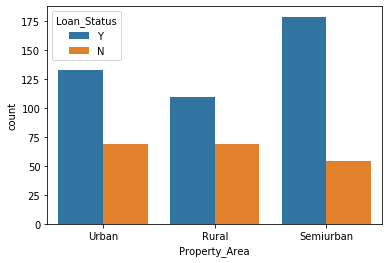

In [7]:
sn.countplot(df['Property_Area'],hue=df['Loan_Status'])

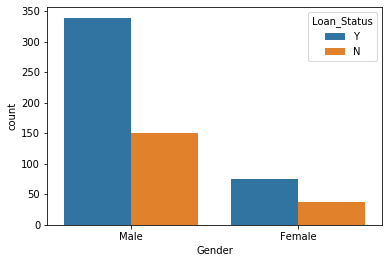

In [8]:
sn.countplot(df['Gender'],hue=df['Loan_Status'])

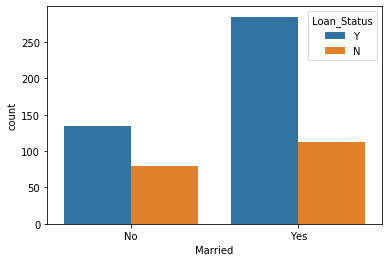

In [9]:
sn.countplot(df['Married'],hue=df['Loan_Status'])

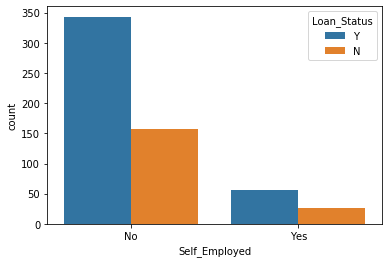

In [10]:
sn.countplot(df['Self_Employed'],hue=df['Loan_Status'])

In [11]:
df2=pd.get_dummies(df.Property_Area)
df.drop("Property_Area", axis=1, inplace=True)
df['Loan_Status'].replace(["N", "Y"], [0,1], inplace=True)

In [12]:
df=pd.concat([df, df2], axis=1, sort=False)



In [13]:
tm=df.groupby("Loan_Status").mean()
tm
v1=tm.iloc[0,:]
v2=tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

CoapplicantIncome    0.110365
LoanAmount           0.023439
Credit_History       0.263759
Rural                0.159202
Semiurban            0.202603
Urban                0.065540
dtype: float64

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,0.0,NaN,1.0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,1508.0,128.0,1.0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,0.0,66.0,1.0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2358.0,120.0,1.0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,0.0,141.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.0,71.0,1.0,1,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,0.0,40.0,1.0,1,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,240.0,253.0,1.0,1,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,0.0,187.0,1.0,1,0,0,1


In [15]:
df["LoanAmount"].fillna(df["LoanAmount"].mean)

0      <bound method Series.mean of 0        NaN\n1  ...
1                                                    128
2                                                     66
3                                                    120
4                                                    141
                             ...                        
609                                                   71
610                                                   40
611                                                  253
612                                                  187
613                                                  133
Name: LoanAmount, Length: 614, dtype: object

In [16]:
df["Education"].replace(["Graduate", "Not Graduate"], [1,0], inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,1,No,0.0,NaN,1.0,1,0,0,1
1,LP001003,Male,Yes,1,1,No,1508.0,128.0,1.0,0,1,0,0
2,LP001005,Male,Yes,0,1,Yes,0.0,66.0,1.0,1,0,0,1
3,LP001006,Male,Yes,0,0,No,2358.0,120.0,1.0,1,0,0,1
4,LP001008,Male,No,0,1,No,0.0,141.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,No,0.0,71.0,1.0,1,1,0,0
610,LP002979,Male,Yes,3+,1,No,0.0,40.0,1.0,1,1,0,0
611,LP002983,Male,Yes,1,1,No,240.0,253.0,1.0,1,0,0,1
612,LP002984,Male,Yes,2,1,No,0.0,187.0,1.0,1,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    object 
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Loan_Status        614 non-null    int64  
 10  Rural              614 non-null    uint8  
 11  Semiurban          614 non-null    uint8  
 12  Urban              614 non-null    uint8  
dtypes: float64(3), int64(2), object(5), uint8(3)
memory usage: 49.9+ KB


In [18]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,1,No,0.0,NaN,1.0,1,0,0,1
1,LP001003,Male,Yes,1,1,No,1508.0,128.0,1.0,0,1,0,0
2,LP001005,Male,Yes,0,1,Yes,0.0,66.0,1.0,1,0,0,1
3,LP001006,Male,Yes,0,0,No,2358.0,120.0,1.0,1,0,0,1
4,LP001008,Male,No,0,1,No,0.0,141.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,No,0.0,71.0,1.0,1,1,0,0
610,LP002979,Male,Yes,3+,1,No,0.0,40.0,1.0,1,1,0,0
611,LP002983,Male,Yes,1,1,No,240.0,253.0,1.0,1,0,0,1
612,LP002984,Male,Yes,2,1,No,0.0,187.0,1.0,1,0,0,1


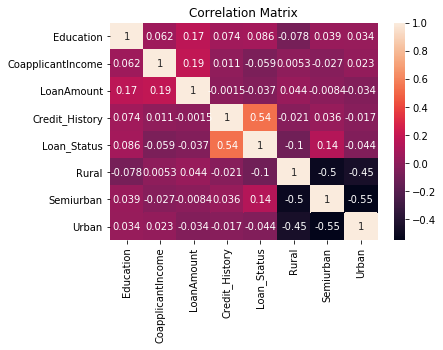

In [19]:
plt.title('Correlation Matrix')
sn.heatmap(df.corr(),annot=True)

In [20]:
df.drop("Loan_ID", axis=1, inplace=True)
df.dropna(inplace=True)

In [21]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education              int64
Self_Employed         object
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Loan_Status            int64
Rural                  uint8
Semiurban              uint8
Urban                  uint8
dtype: object

In [22]:
df3=pd.get_dummies(df.Married)

In [23]:
df4=pd.get_dummies(df.Gender)

In [24]:
df["Self_Employed"].replace(["No", "Yes"], [0,1], inplace=True)

In [25]:
df

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,Male,Yes,1,1,0,1508.0,128.0,1.0,0,1,0,0
2,Male,Yes,0,1,1,0.0,66.0,1.0,1,0,0,1
3,Male,Yes,0,0,0,2358.0,120.0,1.0,1,0,0,1
4,Male,No,0,1,0,0.0,141.0,1.0,1,0,0,1
5,Male,Yes,2,1,1,4196.0,267.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,1,0,0.0,71.0,1.0,1,1,0,0
610,Male,Yes,3+,1,0,0.0,40.0,1.0,1,1,0,0
611,Male,Yes,1,1,0,240.0,253.0,1.0,1,0,0,1
612,Male,Yes,2,1,0,0.0,187.0,1.0,1,0,0,1


In [26]:
df=pd.concat([df, df3, df4], axis=1, sort=False)

In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban,No,Yes,Female,Male
1,Male,Yes,1,1,0,1508.0,128.0,1.0,0,1,0,0,0,1,0,1
2,Male,Yes,0,1,1,0.0,66.0,1.0,1,0,0,1,0,1,0,1
3,Male,Yes,0,0,0,2358.0,120.0,1.0,1,0,0,1,0,1,0,1
4,Male,No,0,1,0,0.0,141.0,1.0,1,0,0,1,1,0,0,1
5,Male,Yes,2,1,1,4196.0,267.0,1.0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,1,0,0.0,71.0,1.0,1,1,0,0,1,0,1,0
610,Male,Yes,3+,1,0,0.0,40.0,1.0,1,1,0,0,0,1,0,1
611,Male,Yes,1,1,0,240.0,253.0,1.0,1,0,0,1,0,1,0,1
612,Male,Yes,2,1,0,0.0,187.0,1.0,1,0,0,1,0,1,0,1


In [28]:
df.drop(["Married","Gender", "Dependents"], axis=1, inplace=True)
df

,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Rural,Semiurban,Urban,No,Yes,Female,Male
1,1,0,1508.0,128.0,1.0,0,1,0,0,0,1,0,1
2,1,1,0.0,66.0,1.0,1,0,0,1,0,1,0,1
3,0,0,2358.0,120.0,1.0,1,0,0,1,0,1,0,1
4,1,0,0.0,141.0,1.0,1,0,0,1,1,0,0,1
5,1,1,4196.0,267.0,1.0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,71.0,1.0,1,1,0,0,1,0,1,0
610,1,0,0.0,40.0,1.0,1,1,0,0,0,1,0,1
611,1,0,240.0,253.0,1.0,1,0,0,1,0,1,0,1
612,1,0,0.0,187.0,1.0,1,0,0,1,0,1,0,1


In [29]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          535 non-null    int64  
 1   Self_Employed      535 non-null    int64  
 2   CoapplicantIncome  535 non-null    float64
 3   LoanAmount         535 non-null    float64
 4   Credit_History     535 non-null    float64
 5   Loan_Status        535 non-null    int64  
 6   Rural              535 non-null    uint8  
 7   Semiurban          535 non-null    uint8  
 8   Urban              535 non-null    uint8  
 9   No                 535 non-null    uint8  
 10  Yes                535 non-null    uint8  
 11  Female             535 non-null    uint8  
 12  Male               535 non-null    uint8  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 32.9 KB


Education              int64
Self_Employed          int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Loan_Status            int64
Rural                  uint8
Semiurban              uint8
Urban                  uint8
No                     uint8
Yes                    uint8
Female                 uint8
Male                   uint8
dtype: object

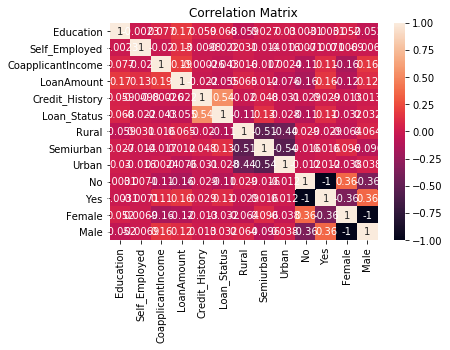

In [30]:
plt.title('Correlation Matrix')
sn.heatmap(df.corr(),annot=True)

In [31]:
x=df.drop('Loan_Status',1)
y=df["Loan_Status"]
df.dropna(inplace=True)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
model=LogisticRegression()
# model=RandomForestClassifier()
# model=XGBClassifier()
model.fit(x_train,y_train)
model.score(x_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8154205607476636

In [33]:
yp=model.predict(x_test)
accuracy_score(y_test,yp)

0.822429906542056

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, yp)
cm

array([[13, 15],
       [ 4, 75]], dtype=int64)